<a href="https://colab.research.google.com/github/GodjaVasile2/Data_Science_Methods_CourseProject/blob/main/Detect_Hate_speech_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [1]:
#Dataset import
from datasets import load_dataset
raw_dateset = load_dataset('hate_speech18')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for hate_speech18 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hate_speech18.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/10944 [00:00<?, ? examples/s]

In [2]:
import pandas as pd


df = raw_dateset['train'].to_pandas()


print("First few rows of the dataset:")
display(df.head())


print("\nDataset information:")
df_info = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.count(),
    "Data Type": df.dtypes
})
display(df_info)


print("\nSummary statistics:")
display(df.describe())

print("\nLabel distribution:")
label_distribution = df['label'].value_counts().reset_index()
label_distribution.columns = ['Label', 'Count']
display(label_distribution)


First few rows of the dataset:


,text,user_id,subforum_id,num_contexts,label
0,"As of March 13th , 2014 , the booklet had been...",572066,1346,0,0
1,In order to help increase the booklets downloa...,572066,1346,0,0
2,( Simply copy and paste the following text int...,572066,1346,0,0
3,Click below for a FREE download of a colorfull...,572066,1346,0,1
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,572066,1346,0,0



Dataset information:


,Column,Non-Null Count,Data Type
text,text,10944,object
user_id,user_id,10944,int64
subforum_id,subforum_id,10944,int64
num_contexts,num_contexts,10944,int64
label,label,10944,int64



Summary statistics:


,user_id,subforum_id,num_contexts,label
count,10944.000000,10944.000000,10944.000000,10944.000000
mean,586478.108918,1369.417306,0.229349,0.168677
std,30995.245917,17.169674,1.121689,0.495675
min,572033.000000,1345.000000,0.000000,0.000000
25%,573558.000000,1354.000000,0.000000,0.000000
50%,577024.000000,1371.000000,0.000000,0.000000
75%,586751.000000,1387.000000,0.000000,0.000000
max,796449.000000,1397.000000,32.000000,3.000000



Label distribution:


,Label,Count
0,0,9507
1,1,1196
2,3,168
3,2,73


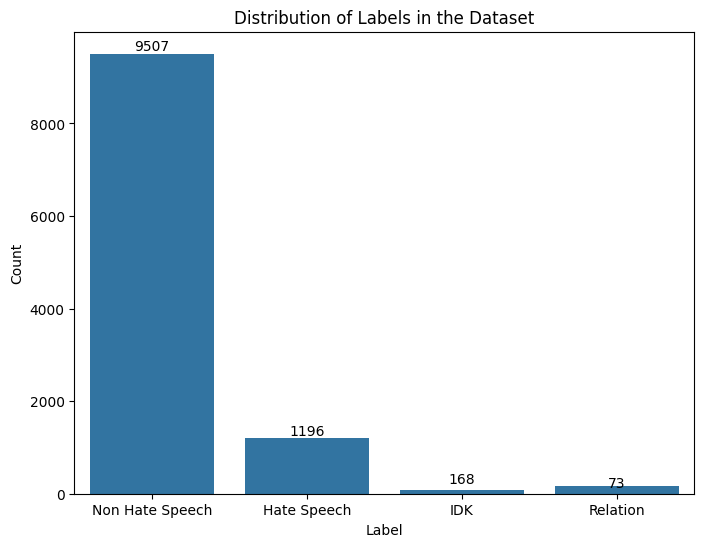

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

label_mapping = {
    0: 'Non Hate Speech',
    1: 'Hate Speech',
    2: 'IDK',
    3: 'Relation'
}
df['label_text'] = df['label'].map(label_mapping)

plt.figure(figsize=(8, 6))
sns.countplot(x='label_text', data=df, order=label_mapping.values())

# Add counts on top of bars
label_counts = df['label_text'].value_counts()
for index, value in enumerate(label_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [4]:
# Drop unnecessary columns and filtre out label 2 and 3
df = df.drop(columns=['user_id', 'subforum_id', 'num_contexts'])
df = df[df['label'] != 2]
df = df[df['label'] != 3]

In [5]:
# Cleaning steps:
# Remove special characters
# Convert to lowercase
# Remove newlines
# Remove leading and trailing spaces
# Remove extra spaces
# Remove stopwords and lemmatize

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = text.replace('\n', ' ')
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df['text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


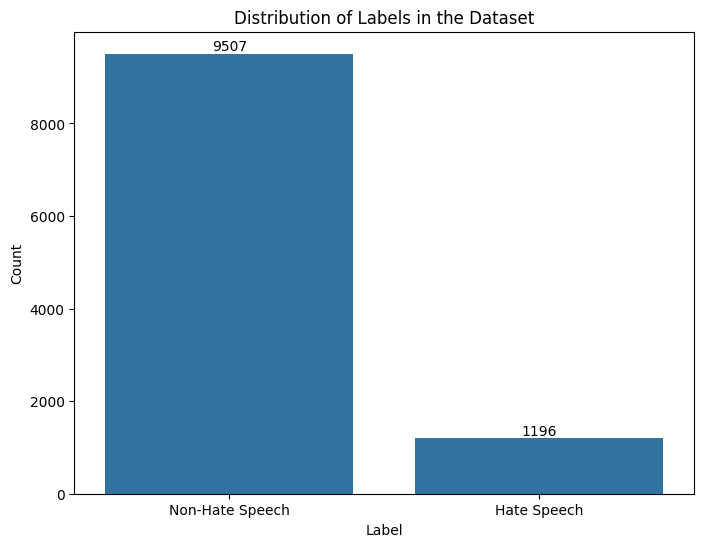

<class 'pandas.core.frame.DataFrame'>
Index: 10703 entries, 0 to 10943
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        10703 non-null  object
 1   label       10703 non-null  int64 
 2   label_text  10703 non-null  object
dtypes: int64(1), object(2)
memory usage: 334.5+ KB
None


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the labels for visualization
df_visual = df.copy()
df_visual['label'] = df_visual['label'].map({1: 'Hate Speech', 0: 'Non-Hate Speech'})

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=df_visual)
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Label')
plt.ylabel('Count')

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()
print(df.info())


In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd


#Split the dataset 70/30
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)


# Training and predictions with LinearSVC
pipeline_svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC(C=0.9)),
])

pipeline_svc.fit(X_train, y_train)
y_pred_svc = pipeline_svc.predict(X_test)



# Training and predictions with RandomForest
pipeline_rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42)),
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)



# Training and predictions with Naive Bayes
pipeline_nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

pipeline_nb.fit(X_train, y_train)
y_pred_nb = pipeline_nb.predict(X_test)



results = {
    "Model": ["LinearSVC", "Random Forest", "Naive Bayes"],
    "Accuracy": [accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_nb)],
    "Precision": [precision_score(y_test, y_pred_svc, average='macro'), precision_score(y_test, y_pred_rf, average='macro'), precision_score(y_test, y_pred_nb, average='macro')],
    "Recall": [recall_score(y_test, y_pred_svc, average='macro'), recall_score(y_test, y_pred_rf, average='macro'), recall_score(y_test, y_pred_nb, average='macro')],
    "F1-Score": [f1_score(y_test, y_pred_svc, average='macro'), f1_score(y_test, y_pred_rf, average='macro'), f1_score(y_test, y_pred_nb, average='macro')]
}
results_df = pd.DataFrame(results)
print(results_df)



           Model  Accuracy  Precision    Recall  F1-Score
0      LinearSVC  0.901900   0.759362  0.625889  0.661501
1  Random Forest  0.896294   0.779340  0.539168  0.546561
2    Naive Bayes  0.891934   0.445967  0.500000  0.471440


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
from sklearn.metrics import classification_report, roc_auc_score

# Build and train SimpleRNN
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000, output_dim=64, input_length=200))
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Build and train LSTM
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=64, input_length=200))
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Build and train Bidirectional SimpleRNN
bi_rnn_model = Sequential()
bi_rnn_model.add(Embedding(input_dim=5000, output_dim=64, input_length=200))
bi_rnn_model.add(Bidirectional(SimpleRNN(32)))
bi_rnn_model.add(Dense(1, activation='sigmoid'))
bi_rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

bi_rnn_history = bi_rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


# Evaluate the model
def evaluate_model(model, X_test, y_test, model_name):
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  y_pred = model.predict(X_test)
  y_pred = (y_pred > 0.5).astype(int)


  print(f"{model_name} Report:")
  print(classification_report(y_test, y_pred))

  roc_auc = roc_auc_score(y_test, y_pred)


  print(f"{model_name} Results:")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
  print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
  print(f"F1-Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
  print(f"ROC-AUC: {roc_auc:.4f}")
  print("-" * 50)

# Evaluate each model
evaluate_model(rnn_model, X_test, y_test, "SimpleRNN")
evaluate_model(lstm_model, X_test, y_test, "LSTM")
evaluate_model(bi_rnn_model, X_test, y_test, "Bidirectional SimpleRNN")


Epoch 1/10
188/188 [==============================] - 13s 59ms/step - loss: 0.3823 - accuracy: 0.8749 - val_loss: 0.3599 - val_accuracy: 0.8853
Epoch 2/10
188/188 [==============================] - 11s 59ms/step - loss: 0.2918 - accuracy: 0.8885 - val_loss: 0.3428 - val_accuracy: 0.8853
Epoch 3/10
188/188 [==============================] - 11s 58ms/step - loss: 0.1535 - accuracy: 0.9479 - val_loss: 0.3476 - val_accuracy: 0.8793
Epoch 4/10
188/188 [==============================] - 12s 62ms/step - loss: 0.0583 - accuracy: 0.9875 - val_loss: 0.3816 - val_accuracy: 0.8739
Epoch 5/10
188/188 [==============================] - 10s 52ms/step - loss: 0.0256 - accuracy: 0.9953 - val_loss: 0.4094 - val_accuracy: 0.8732
Epoch 6/10
188/188 [==============================] - 11s 58ms/step - loss: 0.0141 - accuracy: 0.9983 - val_loss: 0.4383 - val_accuracy: 0.8719
Epoch 7/10
188/188 [==============================] - 11s 58ms/step - loss: 0.0088 - accuracy: 0.9990 - val_loss: 0.4675 - val_accuracy:

In [1]:

import pandas as pd

# Data from the results
data = {
    "Model": ["SimpleRNN", "LSTM", "Bidirectional SimpleRNN"],
    "Accuracy": [0.8655, 0.8729, 0.8708],
    "Precision": [0.5914, 0.6558, 0.6360],
    "Recall": [0.5535, 0.6299, 0.5983],
    "F1-Score": [0.5633, 0.6410, 0.6121],
    "ROC-AUC": [0.5535, 0.6299, 0.5983]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)


                     Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0                SimpleRNN    0.8655     0.5914  0.5535    0.5633   0.5535
1                     LSTM    0.8729     0.6558  0.6299    0.6410   0.6299
2  Bidirectional SimpleRNN    0.8708     0.6360  0.5983    0.6121   0.5983


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf
from sklearn.model_selection import train_test_split


tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


X = df['text'].tolist()
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=128)


train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(len(X_train)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(32)


model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(train_dataset, epochs=1, batch_size=32)


loss, accuracy = model.evaluate(test_dataset)
print(f"DistilBERT Accuracy: {accuracy}")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

 15/235 [>.............................] - ETA: 1:35:24 - loss: 2.2508 - accuracy: 0.6625